In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

movie = pd.read_csv('movies.csv')
ott = pd.read_excel('ott.xlsx')

In [2]:
# merge two files

mov_ott = pd.merge(movie, ott, on='ID', how='left')
mov_ott.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


<AxesSubplot:xlabel='Age', ylabel='count'>

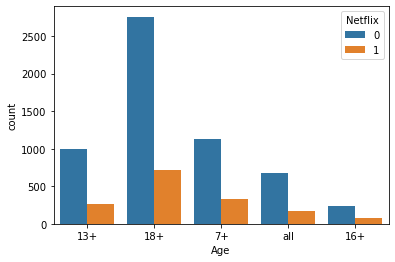

In [3]:
# 2. Plot a countplot to determine what age group has streamed the most movies.

sns.countplot(x='Age', hue = 'Netflix', data=mov_ott)

# 2.a What age group had the most-streamed movies? Aged 18+
# 2.b Can you identify any gaps that Netflix need to address? Yes, aged from 7+ to 13+ and 13+ to 16+

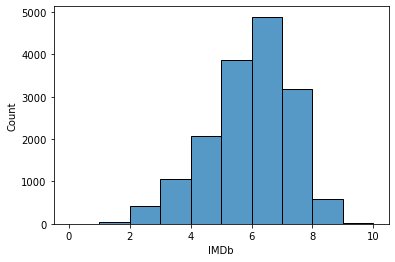

In [26]:
# 3. Plot a histogram for the IMDb rating column
sns.histplot(data=mov_ott, x='IMDb', binwidth=1)

# 3.a What do you understand from the histogram?
# the histogram shows the distribution of the variable. IMDb rating from 6 - 7 has the highest number of the movies.
# 3.b What are the outliers in the data?
# IMDb rating from 1 to 2 and from 9 to 10

plt.savefig('save_as_a_png.png')

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

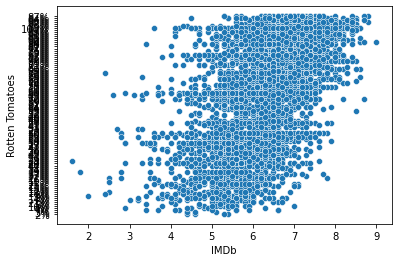

In [5]:
# 4. Plot a scatterplot using the scatterplot function to display the correlation between the ratings from Rotten Tomatoes and IMDb
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=mov_ott)

# 4.a What can you infer about the correlation? there is a positive correlation between IMdb and Rotteb Tomatoes.

# 4.b If there is a correlation, is the relationship between the ratings strong or weak and positive or negative? strong positive

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

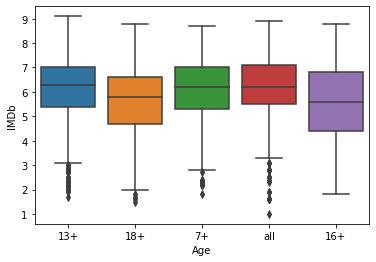

In [6]:
# Plot a boxplot to display the outliers when comparing the user age and their IMDb ratings for the movies

sns.boxplot(x='Age', y='IMDb', data=mov_ott)

# What can you infer from the outliers of the ratings data given by different age groups? the outlier can be seen from
# the plot: IMbD rating from 1-3 can be seen as outliers among ages 13+ group etc.
# How can you improve the quality of the figure? Change the order of age groups.

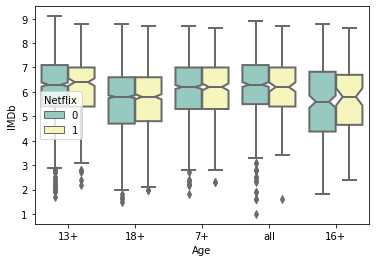

In [19]:
# Customise the boxplot

sns.boxplot(data=mov_ott, x='Age', y='IMDb', linewidth=2, 
            notch=True, hue='Netflix', palette='Set3')

plt.show()

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

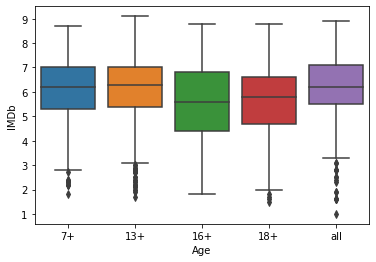

In [7]:
# Create a boxplot: Specific order of variables
# Specify the order of variables. 
# age_order = mov_ott.groupby(by=['Age'])['IMDb'].median().iloc[::-1].index (this means ordered by decreasing median so not ordered by age)

sns.boxplot(x='Age', y='IMDb', order=["7+", "13+", "16+", "18+", "all"], data=mov_ott)

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

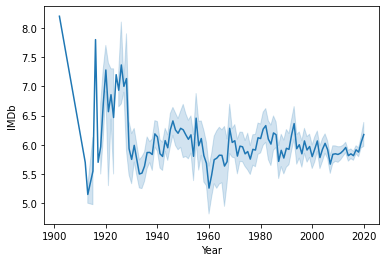

In [8]:
# Plot a lineplot to identify possible trends by comparing the movies' release year and their IMDb ratings

sns.lineplot(x='Year', y='IMDb', data=mov_ott) 

# 2.a What can you infer about the users’ ratings for movies released between 1920 and 1940?
# the ratings goes down from 1920 to 1940
# What can you infer about the users’ ratings for movies released between 1960 and 1980?
# the ratings has been fluctuated between 1960 and 1980. However, the ratings tend to increase during the time.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

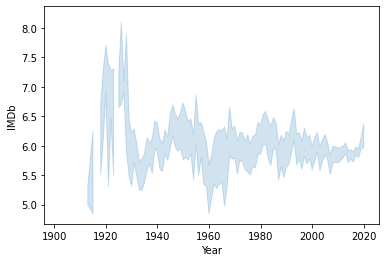

In [20]:
# Customiese the lineplot: changing the linewidth to zero 

sns.lineplot(x = 'Year', y = 'IMDb', data=mov_ott, linewidth=0)

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

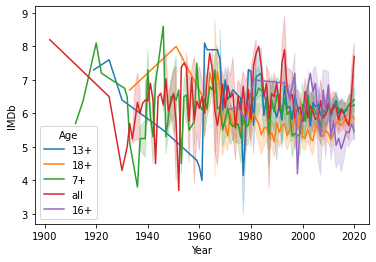

In [9]:
# Enhance the lineplot to include a comparison between the age, rating, and year of release of the movies
sns.lineplot(x='Year', y='IMDb', data=mov_ott, hue='Age') 

# 3.a How would you further enhance the lineplot? make it as clear as possible, remove confidence intervel band 

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

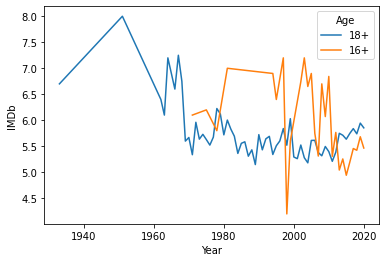

In [10]:
# Create lineplots with specification.
sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott[mov_ott['Age'].isin(['16+', '18+'])],
             hue ='Age', ci=None)

# 'ci=None' remove the confidence interval band"

# 3.b What can you infer about the movies with a 16+ and 18+ age limit? 
# aged 18+ seems to prefer the movies rated between 5 and 6 from 1980 to 2020
# aged 16+ fluctuates a lot, they seem to like the movies rated 4.5 to 5 in 2000 but prefer rating over 6 after 2020. Then, gowing down to 5 - 5.5 when the time closes to 2020.
# In which year did the film industry start marking suitable movies for individuals 16+? 
# from 2000 to around 2010, the film industry seems to make suitable movied for 16+ as the rating shows 16+ individuals are quite statified with the movies.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

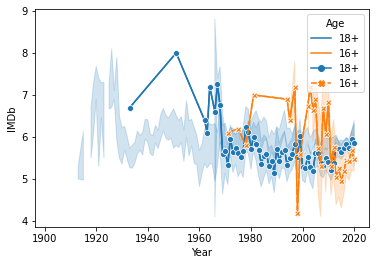

In [22]:
# Customiese the lineplot: changing the linewidth to zero 

sns.lineplot(x = 'Year', y = 'IMDb', data=mov_ott, linewidth=0)

sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott[mov_ott['Age'].isin(['16+', '18+'])], 
             hue ='Age')

sns.lineplot(x = 'Year', y = 'IMDb', 
             data=mov_ott[mov_ott['Age'].isin(['16+', '18+'])], 
             hue ='Age', style = 'Age', markers=True, ci=0)

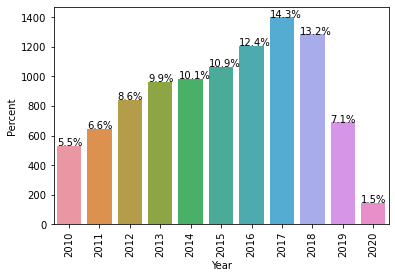

NameError: name 'fig' is not defined

In [23]:
# 4.2.5 customise bar plot
# use percentage to understand the data distribution using the given code
# followed by rotating the label by 90 degrees for better viewing
mov_ott_2010 = mov_ott[mov_ott['Year']>=2010]
ax = sns.countplot(x = 'Year', data=mov_ott_2010)

ax.set(ylabel='Percent')

total = len(mov_ott_2010['Year'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90)
plt.show()

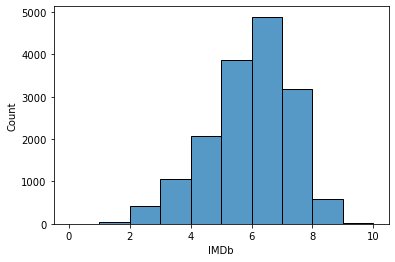

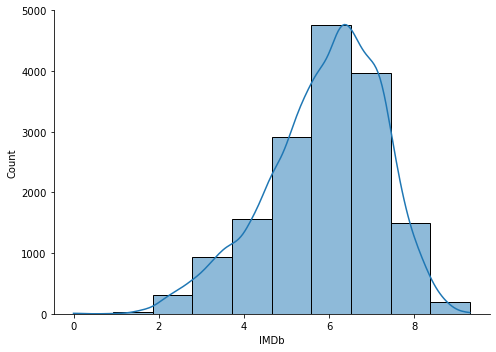

In [18]:
# customise Histogram plot

sns.histplot(data=mov_ott, x='IMDb', binwidth=1)

ax = sns.displot(data=mov_ott, x='IMDb', bins=10, kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()